In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ctgan import CTGAN
from ctgan import load_demo
import data_describe as dd
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('../data/S&P 500 Consumer Staples 100-Day.csv')
data.rename(columns={'Unnamed: 0':'date'}, inplace=True)
data = data.sort_values(by=['date'])
data = data.dropna()
data

,date,S&P 500,S&P 500 Consumer Staples (Sector),S&P 500 Performance (%),S&P 500 Consumer Staples (Sector) Performance (%),S&P 500 Consumer Staples (Sector) Outperform/Underperform,overall,food and beverages,food,nondurables,household furnishings and operations,household furnishings and supplies,tobacco and smoking products,domestically produced farm food,footwear,infants' and toddlers' apparel,men's apparel,women's apparel
4178,2009-12-02,1109.24,279.739990,-6.892963,-1.482663,OUTPERFORM,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083
4179,2009-12-03,1099.92,277.600006,-8.854969,-2.637482,OUTPERFORM,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083
4180,2009-12-04,1105.98,278.859985,-6.801271,-1.685245,OUTPERFORM,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083
4181,2009-12-07,1103.25,278.690002,-8.235323,-2.279182,OUTPERFORM,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083
4182,2009-12-08,1091.94,275.989990,-6.958078,-2.294053,OUTPERFORM,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7194,2021-11-24,4701.46,759.030029,5.426902,-9.852844,UNDERPERFORM,280.126,286.018,287.440,250.940,137.301,100.007,1308.024,276.523,142.098,115.569,122.989,104.310
7195,2021-11-26,4594.62,748.440002,4.573863,-11.016523,UNDERPERFORM,280.126,286.018,287.440,250.940,137.301,100.007,1308.024,276.523,142.098,115.569,122.989,104.310
7196,2021-11-29,4655.27,752.330017,8.977288,-9.104856,UNDERPERFORM,280.126,286.018,287.440,250.940,137.301,100.007,1308.024,276.523,142.098,115.569,122.989,104.310
7197,2021-11-30,4567.00,731.760010,6.305224,-11.949655,UNDERPERFORM,280.126,286.018,287.440,250.940,137.301,100.007,1308.024,276.523,142.098,115.569,122.989,104.310


## Using all data

In [3]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['dow'] = data['date'].dt.dayofweek
data = data[data['dow']==3].groupby(['year','month']).nth[1].reset_index()
data

,year,month,date,S&P 500,S&P 500 Consumer Staples (Sector),S&P 500 Performance (%),S&P 500 Consumer Staples (Sector) Performance (%),S&P 500 Consumer Staples (Sector) Outperform/Underperform,overall,food and beverages,...,nondurables,household furnishings and operations,household furnishings and supplies,tobacco and smoking products,domestically produced farm food,footwear,infants' and toddlers' apparel,men's apparel,women's apparel,dow
0,2009,12,2009-12-10,1102.35,277.260010,-2.286930,0.209635,OUTPERFORM,217.488,218.855,...,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083,3
1,2010,1,2010-01-14,1148.46,279.160004,8.787618,3.719120,UNDERPERFORM,217.281,218.898,...,204.675,126.819,99.689,785.135,220.258,128.812,114.772,117.864,109.921,3
2,2010,2,2010-02-11,1078.47,273.260010,1.716544,1.610091,UNDERPERFORM,217.353,219.321,...,204.268,126.420,99.369,789.437,221.409,128.068,114.977,118.207,110.556,3
3,2010,3,2010-03-11,1150.24,282.130005,2.657837,1.020483,UNDERPERFORM,217.403,219.531,...,203.898,125.751,98.753,793.360,221.387,128.296,114.794,117.661,109.688,3
4,2010,4,2010-04-08,1186.44,286.839996,13.110628,5.088838,UNDERPERFORM,217.290,219.651,...,203.461,125.687,98.588,803.484,221.727,127.650,114.873,117.508,109.725,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2021,7,2021-07-08,4320.82,720.650024,-7.184331,-4.210917,OUTPERFORM,273.092,278.062,...,242.236,132.316,96.118,1254.492,268.392,138.788,113.605,119.623,102.393,3
140,2021,8,2021-08-12,4460.83,743.869995,-6.940799,-7.974468,UNDERPERFORM,274.214,280.413,...,243.569,133.582,97.280,1263.542,271.322,139.549,114.660,119.364,100.292,3
141,2021,9,2021-09-09,4493.28,747.330017,-1.171440,-5.625851,UNDERPERFORM,276.590,282.661,...,246.523,134.667,98.022,1287.067,274.278,139.544,115.831,120.101,101.919,3
142,2021,10,2021-10-14,4438.26,736.159973,3.749053,-3.145767,UNDERPERFORM,278.524,284.676,...,249.378,135.808,98.848,1298.746,275.508,140.361,115.896,122.129,102.875,3


In [4]:
original = data[['S&P 500 Consumer Staples (Sector) Outperform/Underperform','month','overall','food and beverages', 'food', 'nondurables',
       'household furnishings and operations',
       'household furnishings and supplies', 'tobacco and smoking products',
       'domestically produced farm food', 'footwear',
       "infants' and toddlers' apparel", "men's apparel", "women's apparel"]]

In [5]:
data.drop(columns=['date','S&P 500 Consumer Staples (Sector) Outperform/Underperform','year'], inplace=True)
data.head()

,month,S&P 500,S&P 500 Consumer Staples (Sector),S&P 500 Performance (%),S&P 500 Consumer Staples (Sector) Performance (%),overall,food and beverages,food,nondurables,household furnishings and operations,household furnishings and supplies,tobacco and smoking products,domestically produced farm food,footwear,infants' and toddlers' apparel,men's apparel,women's apparel,dow
0,12,1102.35,277.260010,-2.286930,0.209635,217.488,218.855,218.489,205.451,127.331,100.223,784.687,219.857,128.921,114.432,117.239,110.083,3
1,1,1148.46,279.160004,8.787618,3.719120,217.281,218.898,218.552,204.675,126.819,99.689,785.135,220.258,128.812,114.772,117.864,109.921,3
2,2,1078.47,273.260010,1.716544,1.610091,217.353,219.321,218.990,204.268,126.420,99.369,789.437,221.409,128.068,114.977,118.207,110.556,3
3,3,1150.24,282.130005,2.657837,1.020483,217.403,219.531,219.209,203.898,125.751,98.753,793.360,221.387,128.296,114.794,117.661,109.688,3
4,4,1186.44,286.839996,13.110628,5.088838,217.290,219.651,219.331,203.461,125.687,98.588,803.484,221.727,127.650,114.873,117.508,109.725,3


In [6]:
original['Performance'] = np.where(original['S&P 500 Consumer Staples (Sector) Outperform/Underperform'] == 'OUTPERFORM',1,0)
original = original[['Performance','month','overall','food and beverages', 'food', 'nondurables',
       'household furnishings and operations',
       'household furnishings and supplies', 'tobacco and smoking products',
       'domestically produced farm food', 'footwear',
       "infants' and toddlers' apparel", "men's apparel", "women's apparel"]]

In [7]:
dd.data_summary(original)

,Info
Rows,144
Columns,14
Size in Memory,15.9 KB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
Performance,int64,0,0,0,1,1,0.62,0.48,2,90
month,int64,0,0,1,6.50,12,6.50,3.45,12,12
overall,float64,0,0,217.20,238.025,280.13,241.74,14.75,142,2
food and beverages,float64,0,0,218.85,247.53,286.018,246.67,15.53,144,1
food,float64,0,0,218.49,247.74,287.44,246.92,15.83,144,1
nondurables,float64,0,0,202.87,223.85,250.94,222.54,8.43,143,2
household furnishings and operations,float64,0,0,120.28,124.20,137.30,124.32,2.96,144,1
household furnishings and supplies,float64,0,0,89.35,93.52,100.22,94.082,3.18,143,2
tobacco and smoking products,float64,0,0,784.69,949.31,1308.024,983.34,138.14,144,1
domestically produced farm food,float64,0,0,219.86,247.36,276.52,245.84,11.52,144,1


None

data-describe Summary Widget

<AxesSubplot: title={'center': 'Correlation Matrix'}>

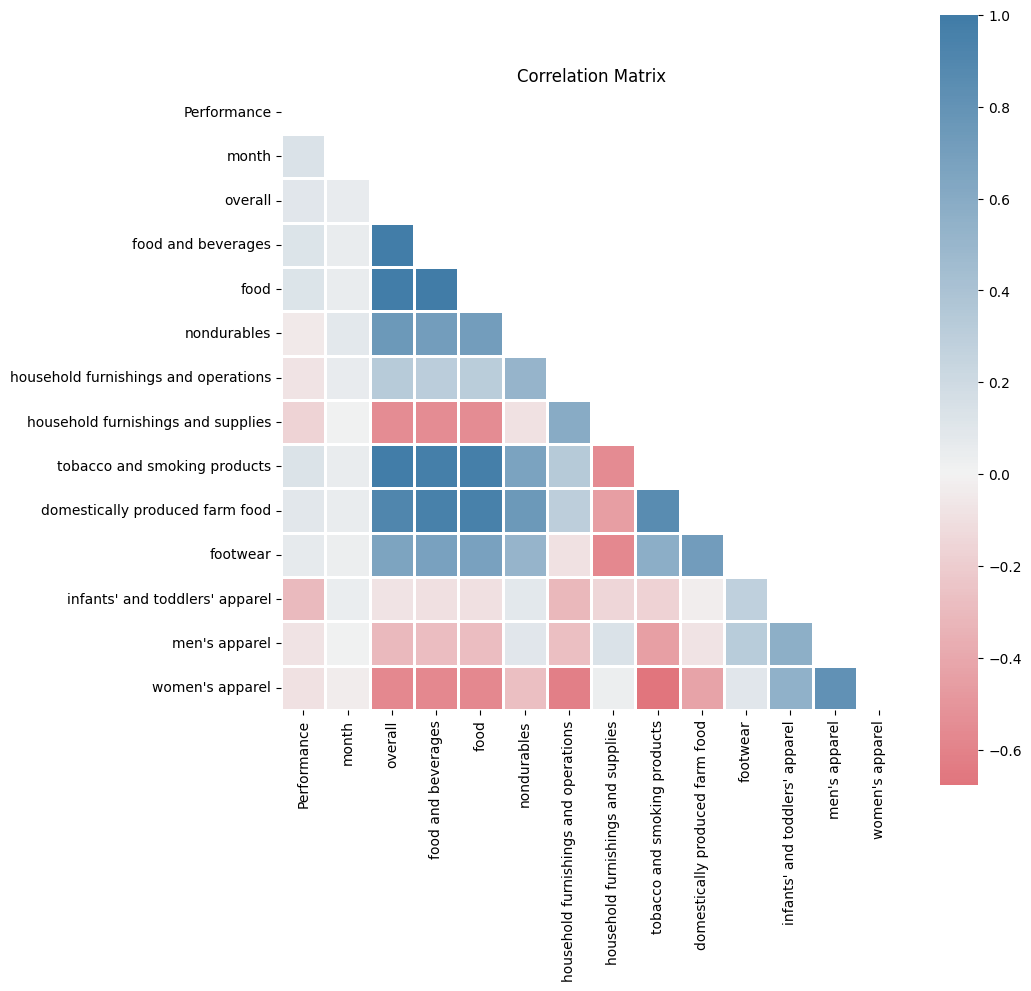

In [8]:
dd.correlation_matrix(original)

### Conditional GAN

In [9]:
discrete_columns = [
    'month'
]

ctgan = CTGAN(epochs=5000)
ctgan.fit(data, discrete_columns)

# Synthetic copy
samples = ctgan.sample(10000)
samples

,month,S&P 500,S&P 500 Consumer Staples (Sector),S&P 500 Performance (%),S&P 500 Consumer Staples (Sector) Performance (%),overall,food and beverages,food,nondurables,household furnishings and operations,household furnishings and supplies,tobacco and smoking products,domestically produced farm food,footwear,infants' and toddlers' apparel,men's apparel,women's apparel,dow
0,2,1467.159078,480.794742,-4.053684,0.944576,221.626597,221.145202,238.368102,201.649940,121.715051,92.343444,895.907064,236.081944,132.978989,107.837693,119.658453,113.755044,3
1,11,1759.276100,502.717241,-1.020437,-4.753671,242.667895,257.400211,247.018916,223.682034,121.957259,91.593398,885.563096,251.749138,136.331596,118.770982,124.170661,114.236963,3
2,7,1093.791098,244.504573,-4.915500,-1.540103,215.314844,216.855775,220.418185,204.498946,123.920976,96.814791,793.700287,222.099397,126.097385,115.523236,115.936953,106.766357,3
3,10,3100.695676,499.567185,3.615130,8.458818,242.840275,263.741226,250.218921,222.509561,121.579005,88.874598,1052.734359,246.666260,134.801937,116.138152,119.042764,109.562560,3
4,4,1742.349372,361.844030,10.981697,1.111639,225.480570,241.087128,243.770931,215.763363,121.469010,97.371464,895.948113,234.041815,126.650994,118.237317,121.690966,114.820736,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,2755.474420,529.131955,-2.793316,-4.398347,267.551237,255.813395,270.892674,221.718501,121.818025,90.445585,1067.644079,248.651215,135.754138,115.658534,121.507662,107.942524,3
9996,10,4488.884316,668.791984,-10.465906,-4.349219,267.138084,287.005366,287.126162,240.005306,136.118329,98.582824,1351.757921,271.166304,128.952402,115.555093,117.295942,100.275660,3
9997,8,588.248780,303.287143,-6.846039,0.462151,211.814940,208.203135,207.605761,198.691161,125.144412,98.000956,765.524248,225.411341,126.157214,111.821775,117.253111,107.791415,3
9998,1,3562.122326,545.088454,0.449829,4.486497,245.456483,252.349242,251.683437,203.230891,120.698109,91.515938,1190.335412,252.015959,138.884866,120.190739,119.822026,114.672899,3


In [10]:
samples['Performance'] = np.where(samples['S&P 500 Consumer Staples (Sector) Performance (%)'] > \
                                  samples['S&P 500 Performance (%)'], 1, 0)

In [11]:
samples = samples[['Performance','month', 'overall','food and beverages', 'food', 'nondurables',
       'household furnishings and operations',
       'household furnishings and supplies', 'tobacco and smoking products',
       'domestically produced farm food', 'footwear',
       "infants' and toddlers' apparel", "men's apparel", "women's apparel"]]
samples.head()

,Performance,month,overall,food and beverages,food,nondurables,household furnishings and operations,household furnishings and supplies,tobacco and smoking products,domestically produced farm food,footwear,infants' and toddlers' apparel,men's apparel,women's apparel
0,1,2,221.626597,221.145202,238.368102,201.649940,121.715051,92.343444,895.907064,236.081944,132.978989,107.837693,119.658453,113.755044
1,0,11,242.667895,257.400211,247.018916,223.682034,121.957259,91.593398,885.563096,251.749138,136.331596,118.770982,124.170661,114.236963
2,1,7,215.314844,216.855775,220.418185,204.498946,123.920976,96.814791,793.700287,222.099397,126.097385,115.523236,115.936953,106.766357
3,1,10,242.840275,263.741226,250.218921,222.509561,121.579005,88.874598,1052.734359,246.666260,134.801937,116.138152,119.042764,109.562560
4,0,4,225.480570,241.087128,243.770931,215.763363,121.469010,97.371464,895.948113,234.041815,126.650994,118.237317,121.690966,114.820736


In [12]:
dd.data_summary(samples)

,Info
Rows,10000
Columns,14
Size in Memory,1.1 MB


,Data Type,Nulls,Zeros,Min,Median,Max,Mean,Standard Deviation,Unique,Top Frequency
Performance,int64,0,0,0,1,1,0.67,0.47,2,6723
month,int64,0,0,1,7,12,6.54,3.44,12,868
overall,float64,0,0,204.97,239.67,291.97,241.86,16.39,10000,1
food and beverages,float64,0,0,198.71,247.76,297.40,247.37,17.54,9999,2
food,float64,0,0,201.051,248.73,304.75,250.090,18.46,10000,1
nondurables,float64,0,0,189.45,222.64,259.91,221.12,9.54,10000,1
household furnishings and operations,float64,0,0,118.77,124.22,144.35,124.91,4.096,9999,2
household furnishings and supplies,float64,0,0,86.26,92.45,103.44,93.57,3.43,10000,1
tobacco and smoking products,float64,0,0,734.11,947.46,1473.88,1005.035,154.099,10000,1
domestically produced farm food,float64,0,0,209.62,247.32,285.45,246.71,11.75,10000,1


None

data-describe Summary Widget

<AxesSubplot: title={'center': 'Correlation Matrix'}>

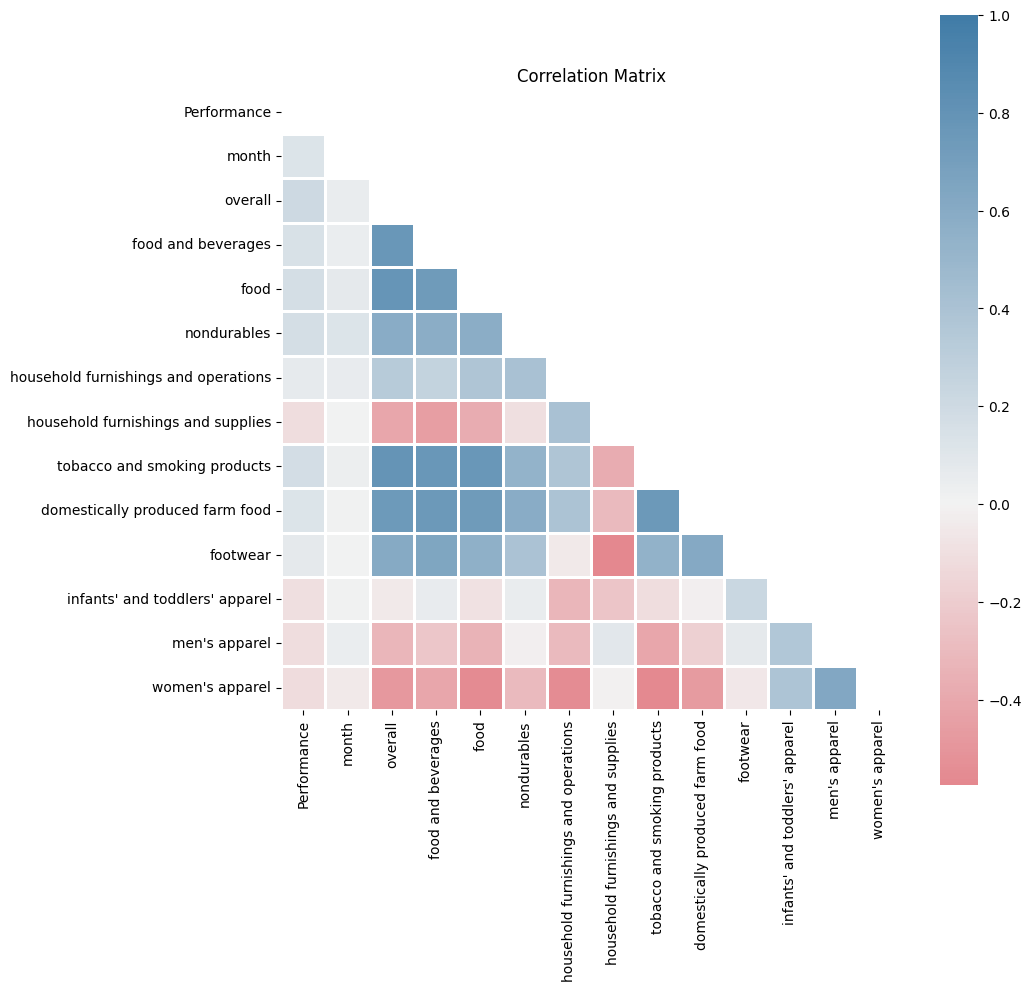

In [13]:
dd.correlation_matrix(samples)

In [14]:
X = samples.drop(['Performance'],axis=1)
y = samples['Performance']

### SMOTE Oversampling

In [15]:
counter = Counter(y)
print(counter)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({1: 6723, 0: 3277})
Counter({1: 6723, 0: 6723})


### Interaction Terms

In [16]:
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_poly = poly.fit_transform(X.drop(['month'],axis=1))
X_poly

array([[  221.62659738,   221.14520207,   238.36810167, ...,
        12903.69153232, 12267.08155285, 13611.75262938],
       [  242.66789456,   257.40021135,   247.01891562, ...,
        14747.87126705, 13568.03622296, 14184.87917615],
       [  215.31484418,   216.85577517,   220.41818451, ...,
        13393.41199493, 12333.99511934, 12378.16613859],
       ...,
       [  250.57937504,   242.15327599,   270.78289081, ...,
        14043.72290904, 12676.7992446 , 13276.87410403],
       [  232.45802448,   254.26123902,   248.08718416, ...,
        14233.76040185, 13364.21913849, 14085.83981238],
       [  255.7366918 ,   252.22732534,   250.95574389, ...,
        14594.62942894, 13646.53737985, 14092.89660514]])

In [17]:
month = X['month'].to_numpy()
month = np.reshape(month,(-1,1))
X = np.append(X_poly,month,1)
X.shape

(13446, 79)

In [18]:
X_real = original.drop(['Performance'],axis=1)
y_real = original['Performance']
X_real_poly = poly.fit_transform(X_real.drop(['month'],axis=1))
month = X_real['month'].to_numpy()
month = np.reshape(month,(-1,1))
X_real = np.append(X_real_poly,month,1)
X_real.shape

(144, 79)

In [19]:
stscaler = StandardScaler().fit(X)
X = stscaler.transform(X)
X_real = stscaler.transform(X_real)

### Training with CV

In [20]:
random_state = 42
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = random_state)
classifiers = []

classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(BaggingClassifier(random_state=random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(GaussianNB())

k_fold = StratifiedKFold(n_splits=10)

Model_Comparison = pd.DataFrame(columns=['Name', 'CV Mean Accuracy', 'CV Mean Precision', 'CV Mean Recall',\
                                         'CV Mean F-1 Score', \
                                         'Accuracy', 'Precision', 'Recall', 'F-1 Score',\
                                        'Accuracy Real', 'Precision Real', 'Recall Real', 'F-1 Score Real'])
row = 0
for clf in classifiers:
    name = clf.__class__.__name__
    Model_Comparison.loc[row, 'Name'] = name
    
    Model_Comparison.loc[row, 'CV Mean Accuracy'] = cross_val_score(clf, X, y, scoring = 'accuracy', \
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean Precision'] = cross_val_score(clf, X, y, scoring = 'precision',\
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean Recall'] = cross_val_score(clf, X, y, scoring = 'recall', \
                                                                 cv = k_fold, n_jobs = 10).mean()
    Model_Comparison.loc[row, 'CV Mean F-1 Score'] = cross_val_score(clf, X, y, scoring = 'f1', \
                                                                 cv = k_fold, n_jobs = 10).mean()

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    Model_Comparison.loc[row, 'Accuracy'] = accuracy_score(y_test, y_pred)
    Model_Comparison.loc[row, 'Precision'] = precision_score(y_test, y_pred)
    Model_Comparison.loc[row, 'Recall'] = recall_score(y_test, y_pred)
    Model_Comparison.loc[row, 'F-1 Score'] = f1_score(y_test, y_pred)
    
    y_pred = clf.predict(X_real)
    Model_Comparison.loc[row, 'Accuracy Real'] = accuracy_score(y_real, y_pred)
    Model_Comparison.loc[row, 'Precision Real'] = precision_score(y_real, y_pred)
    Model_Comparison.loc[row, 'Recall Real'] = recall_score(y_real, y_pred)
    Model_Comparison.loc[row, 'F-1 Score Real'] = f1_score(y_real, y_pred)
    
    row += 1
Model_Comparison

,Name,CV Mean Accuracy,CV Mean Precision,CV Mean Recall,CV Mean F-1 Score,Accuracy,Precision,Recall,F-1 Score,Accuracy Real,Precision Real,Recall Real,F-1 Score Real
0,KNeighborsClassifier,0.697837,0.772809,0.567906,0.653387,0.664783,0.719841,0.53956,0.616797,0.520833,0.723404,0.377778,0.49635
1,DecisionTreeClassifier,0.6698,0.68471,0.63989,0.660443,0.670434,0.676308,0.653778,0.664852,0.5625,0.655172,0.633333,0.644068
2,RandomForestClassifier,0.77303,0.821041,0.71129,0.759583,0.746877,0.780785,0.686496,0.730611,0.597222,0.728571,0.566667,0.6375
3,AdaBoostClassifier,0.66184,0.684578,0.604641,0.641578,0.670732,0.697658,0.602617,0.646665,0.569444,0.725806,0.5,0.592105
4,GradientBoostingClassifier,0.685194,0.717925,0.615797,0.662104,0.67906,0.711972,0.601428,0.652048,0.590278,0.731343,0.544444,0.624204
5,ExtraTreesClassifier,0.800472,0.851419,0.741483,0.789568,0.767698,0.806958,0.703748,0.751827,0.583333,0.702703,0.577778,0.634146
6,BaggingClassifier,0.723196,0.785431,0.623529,0.693256,0.699584,0.747237,0.603212,0.667544,0.611111,0.736111,0.588889,0.654321
7,SVC,0.673813,0.711573,0.594522,0.646109,0.668947,0.705499,0.580012,0.636631,0.604167,0.789474,0.5,0.612245
8,GaussianNB,0.606724,0.66937,0.421833,0.517396,0.598156,0.658046,0.408685,0.50422,0.444444,0.613636,0.3,0.402985


### Voting Classifier

In [21]:
et_clf = ExtraTreesClassifier(random_state=random_state)
bag_clf = BaggingClassifier(random_state=random_state)
rf_clf = RandomForestClassifier(random_state=random_state)
classifiers = [('RF', rf_clf), \
               ('ET', et_clf),\
              ('Bagging', bag_clf)]

vc = VotingClassifier(estimators = classifiers, voting = 'soft')     
vc.fit(x_train, y_train)
y_pred = vc.predict(x_test)
vc_res = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F-1 Score'])
vc_res.loc[0, 'Accuracy'] = accuracy_score(y_test, y_pred)
vc_res.loc[0, 'Precision'] = precision_score(y_test, y_pred)
vc_res.loc[0, 'Recall'] = recall_score(y_test, y_pred)
vc_res.loc[0, 'F-1 Score'] = f1_score(y_test, y_pred)
vc_res

,Accuracy,Precision,Recall,F-1 Score
0,0.761154,0.791501,0.709102,0.748039
